<h1>Mini-Projet: Júlia Togashi de Miranda</h1>

In [8]:
import pandas as pd
import numpy as np
import datetime
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

<h1><font color='#3781be'>Exercice 1 <i>(Exploration des données, recherche de leur loi):</i></font></h1>
<blockquote><b>1.</b> Au-dessous le téléchargement des données, et le traitement pour retirerles valeurs Nulles, et après « Three Mile Island ». À la fin, nous avons n = 55 observationsdu coût, comme proposé.</blockquote>

In [9]:
df = pd.read_csv("NuclearPowerAccidents2016.csv")
df.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,12/8/1995,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,3/28/1979,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
4,9/11/1957,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0


In [10]:
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y')
df = df[df["Date"]<datetime.datetime(1979, 3, 28)]
df = df.loc[df['Cost (millions 2013US$)'].notnull()]
df = df['Cost (millions 2013US$)']
print(df.size) 
df.head()

55


4    8189.0
5    4400.0
6    3500.0
7    2900.0
8    2500.0
Name: Cost (millions 2013US$), dtype: float64

<blockquote><b>2. </b>La fonction quantile d'une distribution est l'inverse de la fonction de distribution cumulative.

La CDF de la loi normale est égale à : 

\begin{align}
y &  = {\frac{1}{2}}{(1+ erf{\frac{(x-\mu)}{\sigma\sqrt{2}}})}
\end{align}

Donc nous avons que l’inverse de la CDF, qui est égale à la fonction quartile, est :

\begin{align}
y &  = \mu+ \sigma\sqrt{2} \ erf^{-1}(2p-1)
\end{align}

Pour fini, comment nous voulions démontrer :
 
\begin{align}
F^{-1}(p;0,1) &  = \sqrt{2} \ erf^{-1}(2p-1)
\end{align}

\begin{align}
F^{-1}(p;\mu,\sigma^2) &  =\mu+\sqrt{\sigma^2}\; {F^{-1}(p;0,1)},\quad \forall p \in\;)0,1(
\end{align}

Ci-dessous, nous avons le résultat du graphique QQ pour la loi normale:</blockquote>

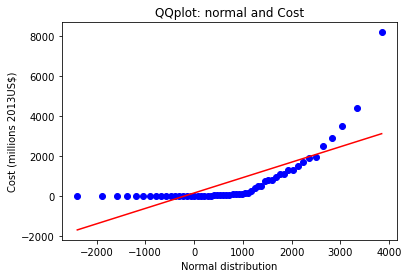

In [11]:
#QQPLOT-Normale
norm_params = stats.norm.fit(df)
stats.probplot(df, dist='norm', sparams=norm_params,plot=plt)
plt.title('QQplot: normal and Cost')
plt.ylabel('Cost (millions 2013US$)')
plt.xlabel('Normal distribution')
plt.show()

<blockquote><b>3.</b> La fonction quantile d'une distribution est l'inverse de la fonction de distribution cumulative.

La CDF de la loi exponentielle est égale à : 

\begin{align}
y &  = 1 -e^{-\lambda x}
\end{align}

Donc nous avons que l’inverse de la CDF, qui est égale à la fonction quartile, est :

\begin{align}
y &  = \frac{-\ln{(1-x)}}{\lambda}
\end{align}

Pour fini, comment nous voulions démontrer :

\begin{align}
F^{-1}(p;1) &  = {-\ln{(1-x)}}
\end{align}

\begin{align}
F^{-1}(p;\lambda) &  = \frac{F^{-1}(p;1)}{\lambda}, \quad\forall p \in(0,1)
\end{align}
    
Ci-dessous, nous avons le résultat du graphique QQ pour la loi exponentielle: </blockquote>

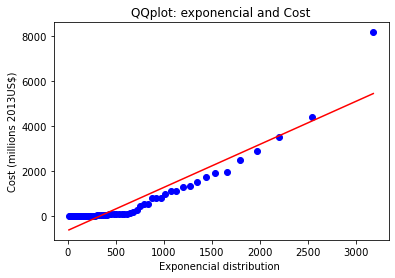

In [12]:
#QQPLOT-Exponentielle
expon_params = stats.expon.fit(df,floc=0)
stats.probplot(df, dist='expon',sparams=expon_params,plot=plt)
plt.title('QQplot: exponencial and Cost')
plt.ylabel('Cost (millions 2013US$)')
plt.xlabel('Exponencial distribution ')
plt.show()

<blockquote><b>4. </b>Le QQplot est une ressource graphique pour déterminer si deux ensembles de données ont une distribution commune (pour comparer la distribution de nos données et une distribution de la littérature), dans laquelle les points représentent les fractions de points de la distribution plus petites qu'une valeur donnée, pour les deux distributions. Les deux distributions sont considérées comme équivalentes si le QQplot résultant ressemble à une ligne à 45<sup>o</sup> par rapport aux axes.</blockquote>
<blockquote>Donc se nous faisons la comparaison, nous pouvons conclure que, étant donné le QQplot, la loi exponentielle c'est plus plausible pour nos données. Le résultat du QQplot se ressemble plus à une ligne (45 degrés) pour la loi exponentielle que pour la loi normale. Ça veut dire que les quantiles sont plus équivalant pour la loi exponentielle.</blockquote>

<h1><font color='#3781be'>Exercice 2 <i>(Estimation ponctuelle des paramètres d’une loi exponentielle):</i></font></h1>

<blockquote><b>1. </b>La densité de probabilité de l’loi exponentielle est égale à :
    
\begin{align}
y &  = \lambda e^{-\lambda x}
\end{align} 

Donc, la vraisemblance du modèle statistique s’écrit comme :

\begin{align}
p_\lambda(x;\lambda) &  = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}
\end{align} 

Suivant, le calculde l'estimateur du maximum de vraisemblance:

\begin{align}
\ln{p_\lambda(x;\lambda)} &  = \ln{(\lambda^n e^{-\lambda \sum_{i=1}^n x_i})}
\end{align} 

\begin{align}
\ln{p_\lambda(x;\lambda)} &  = \ln{(\lambda^n)}+ \ln{(e^{-\lambda \sum_{i=1}^n x_i})}
\end{align} 

\begin{align}
\ln{p_\lambda(x;\lambda)} &  = n\ln{(\lambda)} -\lambda \sum_{i=1}^n x_i
\end{align}

\begin{align}
\frac{\partial\ln{p_\lambda(x;\lambda)}}{\partial \lambda}  &  = n\frac{1}{\lambda} - \sum_{i=1}^n x_i
\end{align}

\begin{align}
n\frac{1}{\lambda} - \sum_{i=1}^n x_i  &  = 0
\end{align}

\begin{align}
\hat{\lambda_n} &  = \frac{n}{\sum_{i=1}^n x_i}
\end{align}

Donc l’estimateur pour lambda c’est égal à l’inverse de la moyenne.
</blockquote>

In [13]:
MLE_lambda=(df.count()/df.sum())
print(MLE_lambda)

0.0013767725947156965


<blockquote><b>2. </b>Vous trouverez ci-dessous le graphique de la loi exponentielle avec le lambda trouvé, ainsi que l'histogramme et la distribution des données.</blockquote>

/Users/lucashommet/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


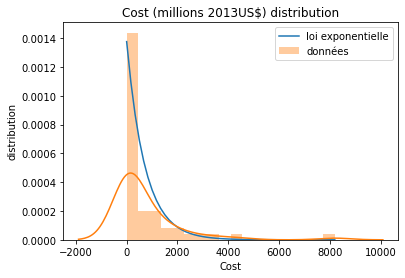

In [14]:
intervalo = np.linspace(df.min(),df.max())
#Exponentielle
exponencial= MLE_lambda* np.exp(-(MLE_lambda*intervalo))
plt.plot(intervalo,exponencial, label ="loi exponentielle")

#empiric
sns.distplot(df,rug=False,kde=True,label ="données")

plt.title('Cost (millions 2013US$) distribution')
plt.legend()
plt.xlabel('Cost')
plt.ylabel('distribution')
plt.show()

<blockquote><b>3. </b>Nous avons qu’un estimateur T<sub>1</sub>(X) non-biaisé d’une quantité g(θ) ∈ R est appelé efficace lorsqu’il atteint la borne de Cramér-Rao, qui est défini ci-dessous :

\begin{align}
Var_\theta{S(X)} \ge \frac{g'(\theta)^2}{I(\theta)}
\end{align} 

où I(θ) est l’information de Fisher relative à l’observation X, lorsque X ∼ Pθ. 

Nous montrons que la statistique T<sub>1</sub>(x) est non-biaisé:

\begin{align}
E(T_1(X)) & = \frac{E_\lambda(\sum_{i=1}^n (Xi))}{n}\\
& = \frac{\sum_{i=1}^n E(Xi)}{n}\\
& = \frac{1}{\lambda}
\end{align} 

Le biais de T<sub>1</sub> en tant qu’estimateur de λ, est donc: bias(T,λ)=0


Donc nous avons que :

\begin{align}
g_1(\lambda) & = \frac{1}{\lambda}
\end{align} 

\begin{align}
g_1'(\lambda) & = -\frac{1}{\lambda^2}
\end{align}

\begin{align}
g_1'(\lambda)^2 & = \frac{1}{\lambda^4}
\end{align} 

Pour la variance de la statistique T<sub>1</sub>(λ) :

\begin{align}
Var_\lambda (T_1)  & = Var(\frac{\sum_{i=1}^n (Xi)}{n}) \\
& = \frac{\sum_{i=1}^n Var(Xi)}{n^2}  \quad (independence)\\
& =\frac{n}{n^2} Var(X) \quad (loi \; exponentielle)\\
& =\frac{1}{n\lambda^2} 
\end{align} 

Et pour l’information de Fisher:

\begin{align}
p_\lambda(x;\lambda) &  = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}
\end{align} 

\begin{align}
\ln{p_\lambda(x;\lambda)} &  = \ln{(\lambda^n e^{-\lambda \sum_{i=1}^n x_i})}
\end{align}

\begin{align}
\frac{\partial\ln{p_\lambda(x;\lambda)}}{\partial \lambda}  &  = n\frac{1}{\lambda} - \sum_{i=1}^n x_i
\end{align}

\begin{align}
I_1 (\lambda)  &  = E_\lambda ((\frac{\partial\ln{p_\lambda(x;\lambda)}}{\partial \lambda}^2))\\
&  = E_\lambda((\frac{1}{\lambda} -x)^2)\\
&  = \frac{1}{\lambda^2}
\end{align}

Enfin:

\begin{align}
I(\lambda) &  = n I_1(\lambda)
\end{align}

\begin{align}
I(\lambda) &  = \frac{n}{\lambda^2}
\end{align}

Nous montrons ci-dessous que le statistique T<sub>1</sub>(λ) est un estimateur efficace pour g(λ) :

\begin{align}
\frac{1}{n\lambda^2} \ge  \frac{\frac{1}{\lambda^4}}{\frac{n}{\lambda^2}}
\end{align}

\begin{align}
\frac{1}{n\lambda^2} & = \frac{1}{n\lambda^2} 
\end{align}

</blockquote>

<blockquote><b>4. </b>Calcul du g<sub>1</sub> en utilisant T<sub>1</sub> pour l’échantillon donné.</blockquote>

In [15]:
T1=(df.sum()/df.count())
print(T1)

726.3363636363637


<blockquote><b>5. </b>Nous proposons un nouvel estimateur T<sub>1,η</sub>(X) = ηT<sub>1</sub>(X), soit η > 0.

Nous cherchons des valeurs de η pour le risque quadratique, on a ∀λ > 0 : R (λ, T<sub>1,η</sub>) < R (λ, T<sub>1</sub>).

Il est connu que:

\begin{align}
R(\theta,\hat{g}) & = EMQ(\theta,\hat{g})
\end{align}

\begin{align}
& = (b(\theta,\hat{g}))^2\; (bias) \quad +Var_\theta (\hat({g}(X)) \;(variance)
\end{align}


Comme nous l'avons déjà démontré à la question 2.3, l'estimateur T<sub>1</sub> est non-biaisé, alors:

\begin{align}
R(\lambda,T_1) & = \frac{1}{n\lambda^2}
\end{align}

Donc, Pour T<sub>1,η</sub>(X):

\begin{align}
E(T_{1,\eta}) & = E(\frac{\eta \sum_{i=1}^n (Xi)}{n})\\
& = \frac{\eta \sum_{i=1}^n E(Xi)}{n}\\
& = \frac{\eta}{\lambda}
\end{align}

Donc T<sub>1,η</sub>(X) est biaisé: 
\begin{align}
bias & = \frac{\eta}{\lambda} - \frac{1}{\lambda} \\
& = \frac{\eta -1}{\lambda}
\end{align}


Maintenant pour la variance:

\begin{align}
Var(T_{1,\eta}) & = Var(\frac{\eta \sum_{i=1}^n (Xi)}{n})\\
& = \frac{\eta^2\sum_{i=1}^n Var(Xi)}{n^2}\\
& = \frac{\eta^2}{n \lambda^2}
\end{align}

Alors on conclut le risque quadratique:

\begin{align}
R(\lambda,T_{1,\eta}) < R(\lambda,T_{1})
\end{align}

\begin{align}
\frac{{(\eta - 1)}^2}{\lambda^2} + \frac{\eta^2}{n \lambda^2} < \frac{1}{n \lambda^2}
\end{align}

\begin{align}
\frac{{(\eta - 1)}^2}{\lambda^2} + \frac{\eta^2}{n \lambda^2} - \frac{1}{n \lambda^2} < 0
\end{align}

\begin{align}
n > 0 ; \lambda \ne 0
\end{align}

\begin{align}
(n+1)\eta^2 -2n\eta+ (n-1) < 0
\end{align}

\begin{align}
\frac{2n \pm \sqrt{4n^2 -4(n+1)(n-1)}}{2n + 2}
\end{align}

\begin{align}
\frac{2n \pm 2}{2n+2}
\end{align}

\begin{align}
\eta_1 = \frac{n-1}{n+1}; \quad \eta_2 = 1
\end{align}

Enfin, nous concluons que:

\begin{align}
\frac{n-1}{n+1} < \eta  < 1
\end{align}

<br>

Comme nous voulions le démontrer, nous avons un intervalle de η  pour lequel le risque quadratique de T<sub>1, η</sub> est inférieur à celui de T<sub>1</sub>. Cela n'est pas en contradiction avec la question précédente, car cela démontre que T<sub>1</sub> est un estimateur efficace de g(λ) et cela reste vrai. Par conséquent, nous avons trouvé un autre estimateur, qui dans cet intervalle est également efficace et comporte moins de risque quadratique.

</blockquote>

<blockquote><b>6. </b>Nous avons que η= ln(2), pour l’estimateur e T<sub>1, η</sub>  est l’estimateur sans biais de la médiane 
et la comparaison ci-dessous:
</blockquote>

In [16]:
T1_n=(np.log(2)*df.sum()/df.count())
print("Médiane trouvée par l’estimateur pour l’échantillon donné: ", T1_n)
print("Médiane empirique: ", df.median())

Médiane trouvée par l’estimateur pour l’échantillon donné:  503.4580025927086
Médiane empirique:  89.9


<blockquote><b>7. </b>Ci-dessous, la comparaison entre les risques quadratiques des estimateurs T<sub>1</sub> et e T<sub>1, η</sub>  , avec η  égale a ln(2) comme estimateurs pour g<sub>1</sub>(λ), en fonction de la taille d’échantillon n.
    
\begin{align}
R(\lambda,T_1) & = \frac{1}{n\lambda^2}
\end{align}

\begin{align}
R(\lambda,T_{1,\eta}) & = \frac{0.0941587n + 0.4804530}{n\lambda^2}
\end{align}

</blockquote>

<h1><font color='#3781be'>Exercice 3 <i>(Test sur le paramètre d’une loi):</i></font></h1>

<blockquote><b>1. </b>Nous souhaitons affirmer avec un faible risque d’erreur que le coût moyen d’un accident est inférieur à un milliard de dollars. Donc nous proposons les hypothèses :  

* L’hypothèse null: H<sub>0</sub>:  $$\frac{1}{\lambda} \ge 1000$$
<br>
* L’hypothèse alternative: H<sub>1</sub>: $$\frac{1}{\lambda} < 1000$$
</blockquote>

<blockquote><b>2. </b>Le principe de Neyman-Pearson nous dites que le Test du rapport de vraisemblance (RV) est le plus puissant quel que soit le choix de α ∈ (0 ; 1).

Nous souhaitons affirmer avec un faible risque d’erreur que le coût moyen d’un accident est inférieur à un milliard de dollars.

\begin{align}
L(\mu; x_1, x_2, ..., x_n) & = \prod_{i=1}^{n} f(x_i; \mu,\sigma)
\end{align}

\begin{align}
f(x_i; \mu,\sigma) & = \prod_{i=1}^{n}\lambda e^{-\lambda x}\\
& = \lambda^n \; e^{-\lambda\sum_{i=1}^{n}x_i}
\end{align}

\begin{align}
\frac{L(\mu; x_1, x_2, ..., x_n)}{L(\mu'; x_1, x_2, ..., x_n)} & = (\frac{\lambda}{\lambda'})^n e^{-(\lambda-\lambda')\sum_{i=1}^{n}x_i}
\end{align}

Donc nous avons pour le principe de Neyman-Pearson, le Test du rapport de vraisemblance plus puissant rejet H<sub>0</sub> si:

\begin{align}
\frac{L(\mu; x_1, x_2, ..., x_n)}{L(\mu'; x_1, x_2, ..., x_n)} < k
\end{align}

\begin{align}
\sum_{i=1}^{n}x_i>\frac{1}{\lambda-\lambda'}log{(k(\frac{\lambda}{\lambda'})^n)}=c
\end{align}

La constant c est obtenu en faisant la valeur α, i.e.  

\begin{align}
\alpha = P(\sum_{i=1}^{n}X_i> c|\lambda=\lambda)
\end{align}et où :

\begin{align}
\sum_{i=1}^{n}X_i\sim Gama(n,\lambda)
\end{align}

</blockquote>

<blockquote><b>3. </b> Le p-valeur est égale à 0.0137 (p-valeur < α). Donc nous pouvons rejeter la hippothèses null (H<sub>0</sub>) : 

$$\frac{1}{\lambda} \ge 1000$$

Ainsi, nous pouvons dire que : « le coût moyen d’accident est inférieur à un milliard de dollars » </blockquote>

In [17]:
p_value = stats.gamma.cdf(x=df.sum(),a=df.size, scale=1000)
print("p-value:",p_value)

p-value: 0.013717486423264914


<blockquote><b>4. </b>Ci-dessous, la densité de probabilité de T<sub>1</sub> (n = 55) et la région du rejet au niveau α = 0.05 :</blockquote>

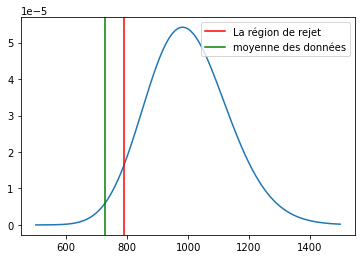

Le point critique est égal à:  789.0147974522821


In [18]:
g=stats.gamma(a=df.size, scale=1000)
plt.plot(np.arange(500,1500),g.pdf(x=np.arange(500*55,1500*55,55)))
plt.axvline(g.ppf(0.05)/55,color='r',label="La région de rejet")
plt.axvline(df.mean(),color='g',label="moyenne des données")
plt.legend(loc="upper right")
plt.show()
print("Le point critique est égal à: ",g.ppf(0.05)/55)

<blockquote><b>5. </b> La taille de l'échantillon détermine la quantité d'erreur d'échantillonnage inhérente au résultat d'un test, donc c'est plus difficile de détecter des effets dans des échantillons plus petits. Ainsi, augmenter la taille de l'échantillon est souvent le moyen le plus simple d'augmenter la puissance d'un test.

Ci-dessous, un graphique la fonction puissance pour chaque valeur de n.</blockquote> 

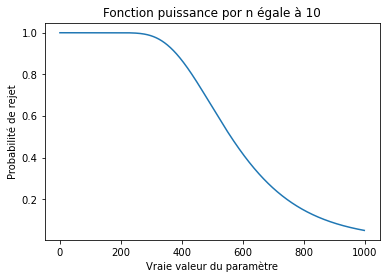

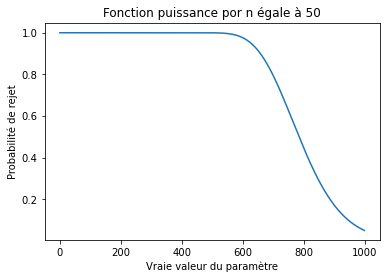

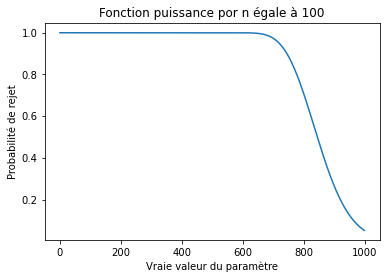

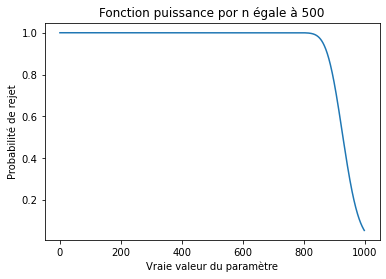

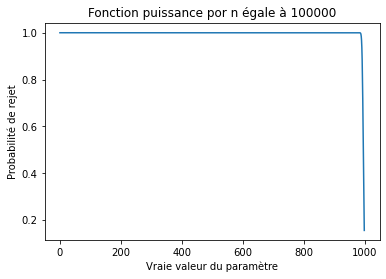

In [19]:
N=[10, 50, 100, 500, 100000]
for n in N:
    g=stats.gamma(a=n, scale=1000)
    puissance=[]
    for i in range(1,999):
        b = stats.gamma.cdf(x=g.ppf(0.05),a=n, scale=i)
        puissance.append(b)
    puissance=np.array(puissance)
    plt.title("Fonction puissance por n égale à "+ str(n))
    plt.xlabel("Vraie valeur du paramètre")
    plt.ylabel("Probabilité de rejet")
    plt.plot(np.arange(1,999),puissance)
    plt.show()

<blockquote><b>6. </b> Le théorème de la limite centrale dit que lorsque la taille de l'échantillon augmente, la distribution de l'échantillon de sa moyenne se rapproche de plus en plus d'une distribution normale.


Ensuite, nous pouvons reprendre le test en utilisant l'approximation de la loi gamma comme une loi gaussienne. Comme nous pouvons le voir ci-dessous, bien que le point critique soit un peu différent, nous continuons à rejeter H<sub>0</sub>, nous pouvons donc continuer à dire que le coût moyen est inférieur à 1 milliard.
</blockquote>

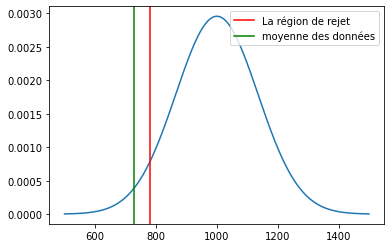

Le point critique est égal à:  778.8624451120565


In [20]:
n=stats.norm.pdf(x=np.arange(500,1500), loc=1000, scale=1/math.sqrt(df.count())*1000)
plt.plot(np.arange(500,1500),n)
plt.axvline(1000-(1.64*1000)/math.sqrt(df.count()),color='r',label="La région de rejet")
plt.axvline(df.mean(),color='g',label="moyenne des données")
plt.legend(loc="upper right")
plt.show()
print("Le point critique est égal à: ",(1000-(1.64*1000)/math.sqrt(df.count())))